# Netflix Stock Price Prediction

## About Dataset
The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

## Step 0: Import all the necessary Libraries

In [53]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

## Step 1: Data Preparation

In [54]:
#Get the stock quote
df = pd.read_csv("C:\\Users\\Vishnu\\Downloads\\Netflix\\NFLX.csv")

In [55]:
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [56]:
#Get the number of rows and columns in the data set 
df.shape 

(1009, 7)

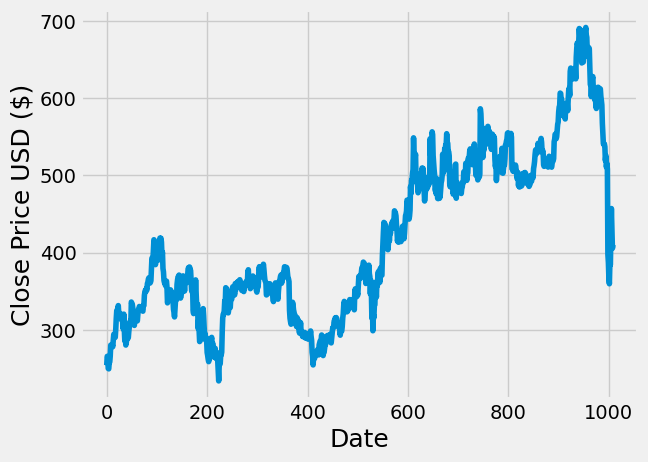

In [57]:
#Visualize the closing price history plt.figure(figsize=(16,8)) plt.title('Close Price History')
plt.plot(df['Close']) 
plt.ylabel('Close Price USD ($)', fontsize=18) 
plt.xlabel('Date', fontsize=18)
plt.show()

## Step2: Data Preprocessing

In [58]:
#Create a new dataframe with only the 'Close column 
data = df.filter(['Close']) 
#Convert the dataframe to a numpy array
dataset = data.values
print(dataset)

[[254.259995]
 [265.720001]
 [264.559998]
 ...
 [429.480011]
 [405.600006]
 [410.170013]]


In [59]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8 ) 
training_data_len

808

In [60]:
#Scale the data
scaler = MinMaxScaler (feature_range=(0,1)) 
scaled_data = scaler.fit_transform (dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [61]:
#Create the training data set 
#Create the scaled training data set 
train_data = scaled_data[0: training_data_len, :] 
#Split the data into x_train and y_train data sets 
x_train = []
y_train = [] 

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i, 0]) 
    if i<= 60: 
        print(x_train) 
        print(y_train) 

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]


In [62]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [63]:
#Reshape the data.

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_train.shape

(748, 60, 1)

## Step3: LSTM Modelling

In [64]:
#Build the LSTM model 
model = Sequential() 
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(50, return_sequences= False)) 
model.add(Dense(25)) 
model.add(Dense(1))

In [65]:
#Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

748/748 [==============================] - 22s 26ms/step - loss: 0.0032


## Step4: Making Predictions and Evaluating the Model

In [67]:
#Create the testing data set  
test_data = scaled_data[training_data_len-60:, :] 
#Create the data sets x_test and y_test
x_test = []
y_test = dataset [training_data_len:, :]
for i in range(60, len(test_data)): 
    x_test.append(test_data[i-60:i, 0])
y_test.shape

(201, 1)

In [68]:
#Convert the data to a numpy array 
x_test = np.array(x_test)

In [69]:
#Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(201, 60, 1)

In [70]:
#Get the models predicted price values 
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
predictions.shape

7/7 [==============================] - 1s 15ms/step


(201, 1)

In [78]:
#Get the root mean squared error (RMSE) 
rmse = np.sqrt( np.mean(predictions - y_test )**2)

rmse

2.202117031065375

In [79]:
accuracy = 100 - rmse
accuracy

97.79788296893463

## Step5: Plotting Results

In [80]:
#Plot the data
train = data[:training_data_len] 
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_9052\1836348047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


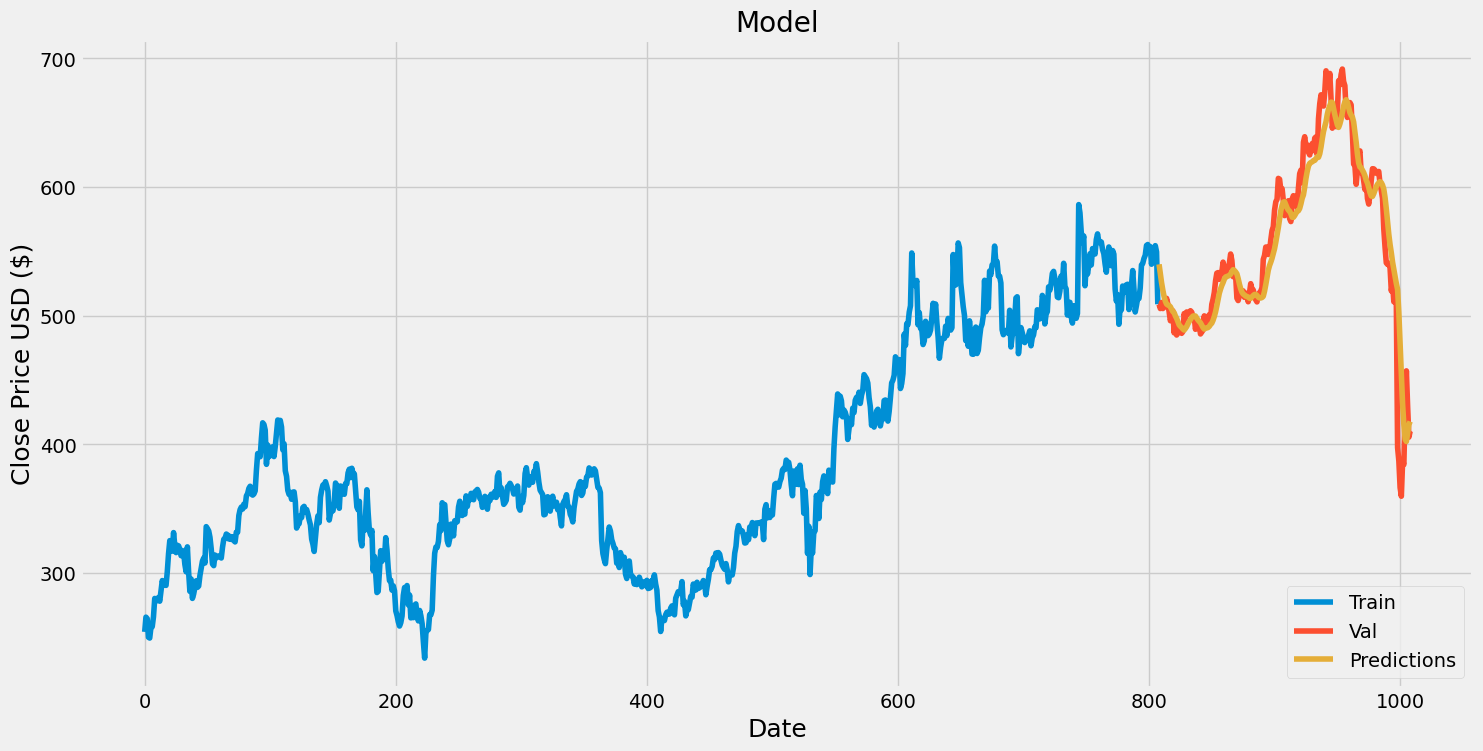

In [81]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [82]:
valid

,Close,Predictions
808,508.779999,539.925781
809,505.549988,532.906616
810,510.299988,525.632568
811,505.549988,519.869141
812,506.519989,514.951111
...,...,...
1004,427.140015,404.038635
1005,457.130005,402.245331
1006,429.480011,408.899292
1007,405.600006,415.303040


In [83]:
#Get the quote
apple_quote = pd.read_csv("C:\\Users\\Vishnu\\Downloads\\Netflix\\NFLX.csv")
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled =scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 18ms/step
[[418.7431]]
